In [4]:
#  see if Carla's code will run
! pip install opencv-python        # had to do this before I could import cv2

In [8]:
# trying to get cvlib installed.  Need other packages installed first, 
# per https://www.oreilly.com/library/view/mastering-opencv-4/9781789344912/8c793967-8bcb-4362-9283-1b31e491e863.xhtml
! pip install requests

In [9]:
! pip install progressbar

  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=12078 sha256=78b36ef72c0d1811837c086a02610e83ddfa70d4029519fb1934d86d3d94a687
  Stored in directory: c:\users\branch\appdata\local\pip\cache\wheels\f0\fd\1f\3e35ed57e94cd8ced38dd46771f1f0f94f65fec548659ed855
Successfully built progressbar


In [10]:
! pip install pillow

In [12]:
! pip install cvlib

  Created wheel for cvlib: filename=cvlib-0.2.6-py3-none-any.whl size=10044625 sha256=23064280f4177cb5609ab3df11513e2476d531a2bfaea6e0350759ba209f394f
  Stored in directory: c:\users\branch\appdata\local\pip\cache\wheels\9b\96\9b\373c07517ffe0bedbebc0813aec1e62cb2bb1dee91b3694895
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25862 sha256=bc4bb3d5fcd07a73ee650c6f6f2ed3e1b1fdf19301a47881733f60e084f8a36b
  Stored in directory: c:\users\branch\appdata\local\pip\cache\wheels\86\d7\0a\4923351ed1cec5d5e24c1eaf8905567b02a0343b24aa873df2
Successfully built cvlib imutils


In [1]:
import tensorflow as tf
import os, shutil
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import cvlib as cv
import random
import seaborn as sns

from keras.preprocessing import image
from sklearn.model_selection import train_test_split

C:\Users\Branch\Anaconda3\anaconda_mess\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Branch\Anaconda3\anaconda_mess\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Branch\Anaconda3\anaconda_mess\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Branch\Anaconda3\anaconda_mess\lib\site-packages\ten

In [2]:
# had to uncompress the archive.zip folder
os.listdir("C:/Users/Branch/Documents/misc. code and homework/DSC680/face mask image recognition project/archive/Medical mask/Medical mask/Medical Mask/images")


['0001.jpg',
 '0002.png',
 '0003.jpg',
 '0004.jpg',
 '0005.jpg',
 '0006.jpg',
 '0007.jpg',
 '0009.jpg',
 '0010.jpg',
 '0011.jpg',
 '0012.jpg',
 '0014.jpg',
 '0015.jpg',
 '0017.jpg',
 '0018.jpg',
 '0019.jpg',
 '0020.jpg',
 '0021.jpg',
 '0022.jpg',
 '0023.jpg',
 '0024.jpg',
 '0025.jpg',
 '0026.jpg',
 '0027.jpg',
 '0028.jpg',
 '0029.jpg',
 '0030.jpg',
 '0031.jpg',
 '0032.jpg',
 '0033.jpg',
 '0034.jpg',
 '0035.jpg',
 '0036.jpg',
 '0037.jpg',
 '0038.jpg',
 '0039.jpg',
 '0040.jpg',
 '0041.jpg',
 '0042.jpg',
 '0043.jpg',
 '0044.jpg',
 '0045.jpg',
 '0046.jpg',
 '0048.jpg',
 '0049.jpg',
 '0050.jpg',
 '0051.jpg',
 '0052.jpeg',
 '0053.jpg',
 '0054.jpg',
 '0055.jpg',
 '0056.jpg',
 '0057.jpg',
 '0058.jpg',
 '0059.jpg',
 '0060.jpg',
 '0061.jpg',
 '0062.jpg',
 '0063.jpg',
 '0064.jpg',
 '0065.jpg',
 '0066.jpg',
 '0067.jpg',
 '0068.jpg',
 '0069.jpg',
 '0070.jpg',
 '0071.jpg',
 '0072.jpg',
 '0073.jpg',
 '0074.jpg',
 '0075.jpg',
 '0076.jpg',
 '0077.jpg',
 '0078.png',
 '0079.jpg',
 '0081.jpg',
 '0082.png'

In [3]:
# I think I need to change the working directory to the new uncompressed archive folder.
os.getcwd( )

'C:\\Users\\Branch\\Documents\\misc. code and homework\\DSC680\\Amazon project'

In [4]:
# load the dataset
df = pd.read_csv('C:/Users/Branch/Documents/misc. code and homework/DSC680/face mask image recognition project/train.csv')
df.head()                    # preview the dataset

,name,x1,x2,y1,y2,classname
0,2756.png,69,126,294,392,face_with_mask
1,2756.png,505,10,723,283,face_with_mask
2,2756.png,75,252,264,390,mask_colorful
3,2756.png,521,136,711,277,mask_colorful
4,6098.jpg,360,85,728,653,face_no_mask


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15412 entries, 0 to 15411
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       15412 non-null  object
 1   x1         15412 non-null  int64 
 2   x2         15412 non-null  int64 
 3   y1         15412 non-null  int64 
 4   y2         15412 non-null  int64 
 5   classname  15412 non-null  object
dtypes: int64(4), object(2)
memory usage: 722.6+ KB
None


In [6]:
df['classname'].value_counts()                 # see the classification counts

face_with_mask              4180
mask_surgical               2430
mask_colorful               1876
face_no_mask                1569
face_other_covering         1372
eyeglasses                   914
hat                          823
sunglasses                   358
hair_net                     287
scarf_bandana                260
goggles                      192
helmet                       187
hijab_niqab                  173
face_shield                  160
hood                         159
face_with_mask_incorrect     150
balaclava_ski_mask           134
turban                        94
gas_mask                      55
other                         39
Name: classname, dtype: int64

In [7]:
df['classname'].isna().sum()             # look for missing values

0

In [8]:
# get rid of all columns except face_with_mask and face_no_mask, change name to 'train' for clarity
train = df[(df['classname']=='face_with_mask') | (df['classname']=='face_no_mask')]

In [9]:
train['classname'].value_counts()           # see what we are left with.  An unbalanced dataset.

face_with_mask    4180
face_no_mask      1569
Name: classname, dtype: int64

In [10]:
train.head()

,name,x1,x2,y1,y2,classname
0,2756.png,69,126,294,392,face_with_mask
1,2756.png,505,10,723,283,face_with_mask
4,6098.jpg,360,85,728,653,face_no_mask
7,4591.png,239,9,522,342,face_with_mask
11,5525.jpg,262,18,484,319,face_no_mask


Visualize the training dataset

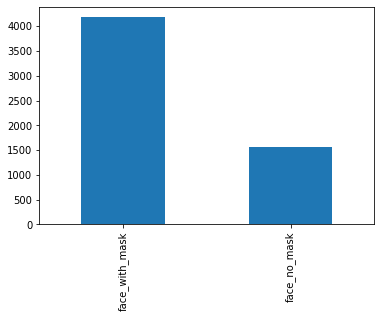

In [11]:
# from https://www.kaggle.com/abhaymudgal/dogs-vs-cats
train['classname'].value_counts().plot(kind = 'bar')

In [12]:
# from https://www.kaggle.com/abhaymudgal/dogs-vs-cats
# Read input files to create training dataset
filenames = os.listdir(r'C:\Users\Branch\Documents\misc. code and homework\DSC680\face mask image recognition project\images')

classnames = []

for filename in filenames:
    
    classname = filename.split('.')
    
    if(classname == 'face_no_mask'):
        
        classnames.append('face_no_mask')
        
    else:
        
        classnames.append('face_with_mask')
        
# create a dataframe

df5 = pd.DataFrame({
        
        'filename' : filenames,
    
        'classname' : classnames
    
    })

In [13]:
df5.head()

,filename,classname
0,0001.jpg,face_with_mask
1,0002.png,face_with_mask
2,0003.jpg,face_with_mask
3,0004.jpg,face_with_mask
4,0005.jpg,face_with_mask


In [14]:
df5.tail()

,filename,classname
6020,6432.jpg,face_with_mask
6021,6433.png,face_with_mask
6022,6434.jpg,face_with_mask
6023,6435.jpg,face_with_mask
6024,smaller_dataset,face_with_mask


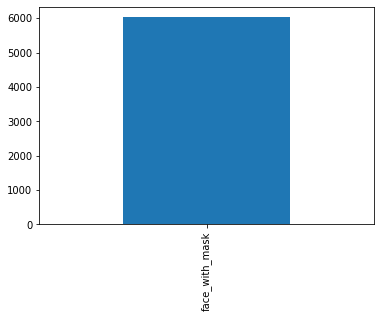

In [15]:
df5['classname'].value_counts().plot(kind = 'bar')
# Well this isn't right!!  Where did the 'face_no_mask' images go?!

In [16]:
# import technique from p. 132 of 'Deep Learning With Python' text
original_dataset_dir = r'C:\Users\Branch\Documents\misc. code and homework\DSC680\face mask image recognition project\archive\Medical mask\Medical mask\Medical Mask\annotations'
base_dir = r'C:\Users\Branch\Documents\misc. code and homework\DSC680\face mask image recognition project\images\smaller_dataset'
#os.mkdir(base_dir)

I commented out some of the lines in the cell below, because the subfolders only need to be created once!

In [17]:
train_dir = os.path.join(base_dir, 'train')
#os.mkdir(train_dir)                only run this once, and it creates the folder
validation_dir = os.path.join(base_dir, 'validation')
#os.mkdir(validation_dir)           only run this once, and it creates the folder
test_dir = os.path.join(base_dir, 'test')
#os.mkdir(test_dir)                 only run this once, and it creates the folder

train_mask_dir = os.path.join(train_dir, 'face_with_mask')        # 'face_with_mask' = 'cats'
#os.mkdir(train_mask_dir)           This added 'face_with_mask' subfolder inside the 'train' folder

train_no_mask_dir = os.path.join(train_dir, 'face_no_mask')
#os.mkdir(train_no_mask_dir)        This added 'face_no_mask' subfolder inside the 'train' folder

validation_mask_dir = os.path.join(validation_dir, 'face_with_mask')
#os.mkdir(validation_mask_dir)      This added 'face_with_mask' subfolder inside the 'validation' folder

validation_no_mask_dir = os.path.join(validation_dir, 'face_no_mask')
#os.mkdir(validation_no_mask_dir)   This added 'face_with_mask' subfolder inside the 'validation' folder

test_mask_dir = os.path.join(test_dir, 'face_with_mask')
#os.mkdir(test_mask_dir)            This added 'face_with_mask' subfolder inside the 'test' folder

test_no_mask_dir = os.path.join(test_dir, 'face_no_mask')
#os.mkdir(test_no_mask_dir)         This added 'face_with_mask' subfolder inside the 'test' folder

In [57]:
# copy the first 1000 mask images to train_mask_dir
fnames = ['face_with_mask.{}.jpg'.format(i) for i in range (1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_mask_dir, fname)
    shutil.copyfile(src,dst)
    
fnames = ['face_with_mask.{}.jpg'.format(i) for i in range (1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_mask_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['face_with_mask.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_mask_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['face_no_mask.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_no_mask_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['face_no_mask.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst - os.path.join(validation_no_mask_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['face_no_mask.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_no_mask_dir, fname)
    shutil.copyfile(src, dst)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Branch\\Documents\\misc. code and homework\\DSC680\\face mask image recognition project\\archive\\Medical mask\\Medical mask\\Medical Mask\\annotations\\face_with_mask.0.jpg'

In [ ]:
# trying to get the data loaded in keras
# https://towardsdatascience.com/introduction-to-keras-part-one-data-loading-43b9c015e27c
'''
import pathlib
import tensorflow as tf

dataset_url = (r"C:\Users\Branch\Documents\misc. code and homework\DSC680\face mask image recognition project\archive\Medical mask\Medical mask\Medical Mask\annotations")
data_dir = tf.keras.utils.get_file(
    dataset_url, fname="face_photos", untar=True
)

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir, image_size=(180, 180), batch_size=64
)

print(type(dataset))
'''
# This was part of a different attempt.  Leaving it here out of paranoia that it might be this program's 'miracle cure!'

In [40]:
# This is going no where.  Skip to page 134
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                       input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Using TensorFlow backend.


In [41]:
model.summary()    # see how the dimensions of the feature maps change from layer to layer

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [44]:
# configure the model for training (from p. 135 in Chollet text)
from keras import optimizers
model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [58]:
# read images from directories using ImageDataGenerator (from Keras)
# This takes the image files and turns them into tensors!
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)        # rescales all images by 1/255
test_datagen = ImageDataGenerator(rescale=1./255)         # same

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 0 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


# Where is my 'validation' file?

In [ ]:
# I found the 'validation' (and test, and train) file.  Now I need to populate them with pictures!!!